# Figures

This notebook generates the figures used in the thesis from precomputed analysis outputs.

Before running:
- Set `ROOT` below to your local thesis directory.
- Run `decoding.ipynb` and `permutations.ipynb` first.

In [1]:
import os, sys, importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pingouin as pg

ROOT = r"C:\Users\donja\Desktop\Thesis"
CODE_DIR    = os.path.join(ROOT, "Code")
RESULTS_DEC = os.path.join(ROOT, "Results", "decoding")
FIG_DIR = os.path.join(ROOT, "Results")
os.makedirs(FIG_DIR, exist_ok=True)

METRICS_CSV  = os.path.join(RESULTS_DEC, "decoding_metrics_all_subjects.csv")
SNR_CSV      = os.path.join(RESULTS_DEC, "snr_all_subjects.csv")
LCURVE_PKL   = os.path.join(RESULTS_DEC, "learning_curves_all_subjects.pkl")

print("Using results from:", RESULTS_DEC)

# style
sns.set(style="whitegrid", context="talk")

if CODE_DIR not in sys.path:
    sys.path.append(CODE_DIR)

import decoding_utils
importlib.reload(decoding_utils)  # just in case

df_metrics = pd.read_csv(METRICS_CSV)
df_snr     = pd.read_csv(SNR_CSV)
df_lc      = pd.read_pickle(LCURVE_PKL)

df_metrics_use = df_metrics[df_metrics["subject"] != "sub-004"].copy()
df_snr_use = df_snr[df_snr["subject"] != "sub-004"].copy()
df_lc_use = df_lc[df_lc["subject"] != "sub-004"].copy()

print("df_metrics:", df_metrics_use.shape, "subjects:", df_metrics_use["subject"].unique())
print("df_snr    :", df_snr_use.shape,     "subjects:", df_snr_use["subject"].unique())
print("df_lc     :", df_lc_use.shape,      "subjects:", df_lc_use["subject"].unique())


Using results from: C:\Users\donja\Desktop\Thesis\Results\decoding
df_metrics: (48, 7) subjects: ['sub-002' 'sub-003' 'sub-005' 'sub-006']
df_snr    : (48, 5) subjects: ['sub-002' 'sub-003' 'sub-005' 'sub-006']
df_lc     : (48, 7) subjects: ['sub-002' 'sub-003' 'sub-005' 'sub-006']


In [2]:
df_metrics_use

,subject,file,stim_type,contrast,accuracy,decision_time,itr
0,sub-002,sub-002_cvep_classic_10.npz,classic,10,0.842857,4.2,51.343616
1,sub-002,sub-002_cvep_classic_100.npz,classic,100,0.966667,4.2,66.057397
2,sub-002,sub-002_cvep_classic_20.npz,classic,20,0.966667,4.2,66.057397
3,sub-002,sub-002_cvep_classic_30.npz,classic,30,1.000000,4.2,71.428571
4,sub-002,sub-002_cvep_classic_40.npz,classic,40,1.000000,4.2,71.428571
5,sub-002,sub-002_cvep_classic_60.npz,classic,60,1.000000,4.2,71.428571
6,sub-002,sub-002_cvep_grating_10.npz,grating,10,0.057143,4.2,0.184336
7,sub-002,sub-002_cvep_grating_100.npz,grating,100,0.971429,4.2,66.732504
8,sub-002,sub-002_cvep_grating_20.npz,grating,20,0.780952,4.2,45.091006
9,sub-002,sub-002_cvep_grating_30.npz,grating,30,1.000000,4.2,71.428571


## Decoding plots

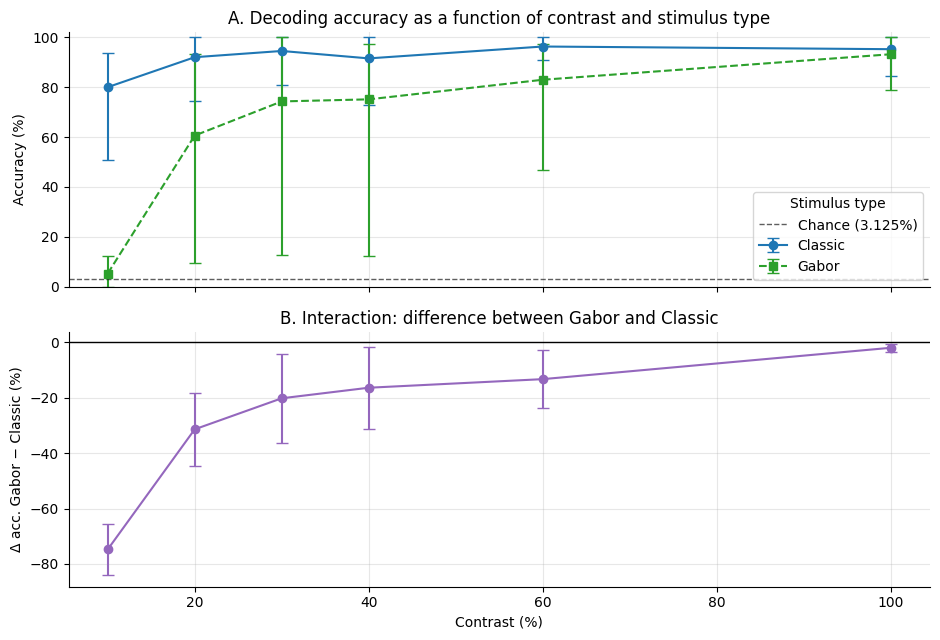

In [3]:
plt.style.use("default")

contrasts = sorted(df_metrics_use["contrast"].unique())
chance_level = 3.125

fig, (axA, axB) = plt.subplots(2, 1, figsize=(9.5, 6.5), sharex=True)

# Accuracy vs contrast plot
for stim_type in ["classic", "grating"]:
    df_stim = df_metrics_use[df_metrics_use["stim_type"] == stim_type]

    stats = (
        df_stim.groupby("contrast")["accuracy"].agg(mean="mean", min="min", max="max")
        .reindex(contrasts)
    )

    means = stats["mean"].to_numpy() * 100
    yerr = np.vstack([
        (stats["mean"] - stats["min"]).to_numpy() * 100,
        (stats["max"] - stats["mean"]).to_numpy() * 100
    ])

    if stim_type == "classic":
        axA.errorbar(contrasts, means, yerr=yerr,
                     marker="o", linestyle="-", color="C0", capsize=4, label="Classic",)
    else:
        axA.errorbar(contrasts, means, yerr=yerr,
                     marker="s", linestyle="--", color="C2", capsize=4, label="Gabor")

axA.axhline(chance_level, linestyle="--", linewidth=1, color="k", alpha=0.7,
            label=f"Chance ({chance_level}%)")
axA.set_ylabel("Accuracy (%)")
axA.set_title("A. Decoding accuracy as a function of contrast and stimulus type")
axA.set_ylim(0, 102)
axA.grid(True, alpha=0.3)
axA.legend(title="Stimulus type")

# remove top and right line (so error bars at high accuracy remain visible)
axA.spines["top"].set_visible(False)
axA.spines["right"].set_visible(False)

# Interaction plot
df_mean = df_metrics_use.groupby(["subject", "stim_type", "contrast"], as_index=False)["accuracy"].mean()
df_pivot = df_mean.pivot_table(index=["subject", "contrast"], columns="stim_type", values="accuracy")
df_pivot["diff_g_minus_c"] = df_pivot["grating"] - df_pivot["classic"]
diff_stats = (df_pivot.groupby("contrast")["diff_g_minus_c"].agg(mean="mean", sem=lambda x: x.std(ddof=1) / np.sqrt(len(x))))

axB.errorbar(diff_stats.index, diff_stats["mean"] * 100, yerr=diff_stats["sem"] * 100, marker="o", linestyle="-", capsize=4, color="C4")
axB.axhline(0, color="black", linewidth=1)
axB.set_xlabel("Contrast (%)")
axB.set_ylabel("Δ acc. Gabor − Classic (%)")
axB.set_title("B. Interaction: difference between Gabor and Classic")
axB.grid(alpha=0.3)

axB.spines["top"].set_visible(False)
axB.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "accuracy_v_contrast_and_interaction_plots.pdf"),dpi=300,bbox_inches="tight")

plt.show()

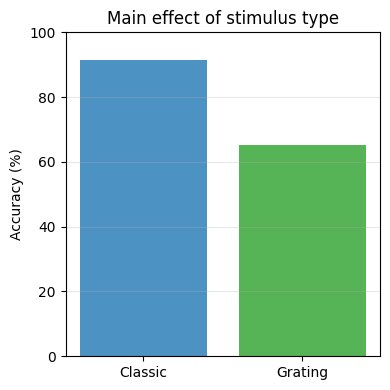

In [4]:
means_stim = (df_metrics_use.groupby("stim_type")["accuracy"].mean().reindex(["classic", "grating"])) * 100

plt.figure(figsize=(4, 4))

x = [0, 1]
plt.bar(x, means_stim.values,color=["C0", "C2"],alpha=0.8)

plt.xticks(x, ["Classic", "Grating"])
plt.ylabel("Accuracy (%)")
plt.title("Main effect of stimulus type")
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


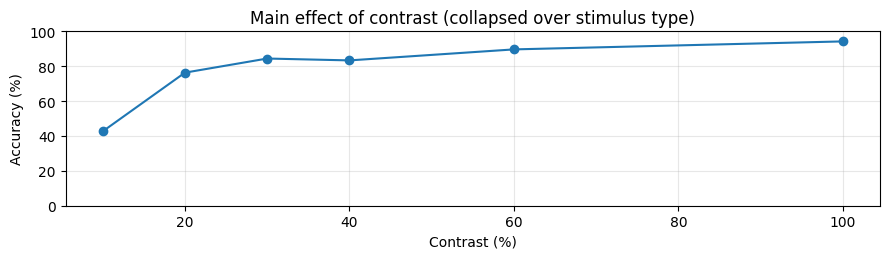

In [5]:
means_contrast = (df_metrics_use.groupby("contrast")["accuracy"].mean().sort_index()) * 100

plt.figure(figsize=(9, 2.7))

plt.plot(means_contrast.index,means_contrast.values,marker="o",linestyle="-",color="C0")

plt.xlabel("Contrast (%)")
plt.ylabel("Accuracy (%)")
plt.title("Main effect of contrast (collapsed over stimulus type)")
plt.ylim(0, 100)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Learning Curves

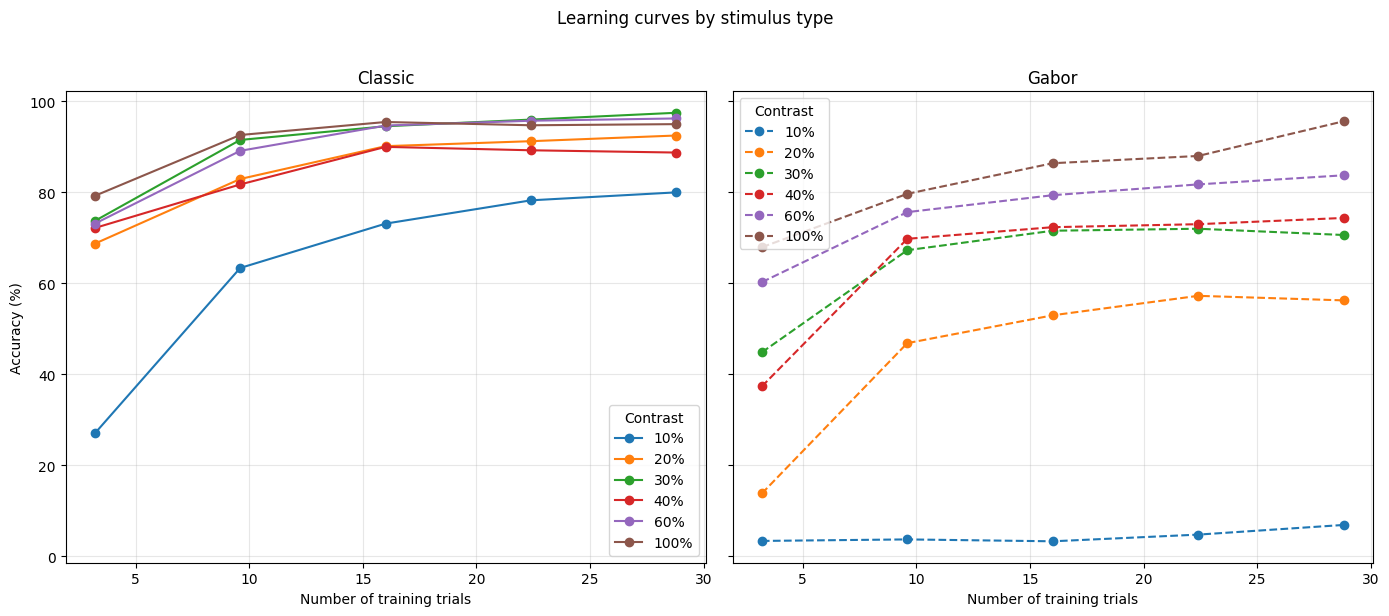

In [6]:
stim_label_map = {
    "classic": "Classic",
    "grating": "Gabor"
}

contrasts = sorted(df_lc_use["contrast"].unique()) 
colors = sns.color_palette("tab10", len(contrasts)) 
linestyle_map = {"classic": "-", "grating": "--"} 
contrast_to_color = {c: colors[i] for i, c in enumerate(contrasts)} 

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) 
stim_types = ["classic", "grating"] 

for ax, stim_type in zip(axes, stim_types): 
    for contrast in contrasts: 
        cond_rows = df_lc_use[ (df_lc_use["stim_type"] == stim_type) & (df_lc_use["contrast"] == contrast) ] 
        if len(cond_rows) == 0: 
            continue 
        
        fracs = np.array(cond_rows.iloc[0]["train_fracs"]) 
        n_trials = cond_rows.iloc[0]["n_trials"] 
        
        acc_mat = np.stack(cond_rows["accs"].values) 
        mean_acc = acc_mat.mean(axis=0) * 100.0 
        
        x = fracs * n_trials 

        ax.plot(x,mean_acc,marker="o",linestyle=linestyle_map[stim_type],color=contrast_to_color[contrast],label=f"{contrast}%",) 
    ax.set_title(f"{stim_label_map[stim_type]}") 
    ax.set_xlabel("Number of training trials") 
    ax.grid(alpha=0.3) 
    ax.legend(title="Contrast") 
axes[0].set_ylabel("Accuracy (%)") 
plt.suptitle("Learning curves by stimulus type", y=1.02) 
plt.tight_layout() 
plt.savefig(os.path.join(FIG_DIR, "learning_curves.pdf"),dpi=300,bbox_inches="tight")

plt.show()

In [7]:
final_results = []

for stim_type in ["classic", "grating"]:
    for contrast in contrasts:
        cond_rows = df_lc_use[
            (df_lc_use["stim_type"] == stim_type) &
            (df_lc_use["contrast"] == contrast)
        ]
        if len(cond_rows) == 0:
            continue

        acc_mat = np.stack(cond_rows["accs"].values)
        mean_acc = acc_mat.mean(axis=0) * 100.0

        final_results.append({
            "stim_type": stim_type,
            "contrast": contrast,
            "final_accuracy": float(mean_acc[-1]),
        })

df_final = pd.DataFrame(final_results)

max_acc = df_final.groupby("stim_type")["final_accuracy"].max()
threshold_90 = 0.9 * max_acc

df_final["reaches_90pct"] = df_final.apply(
    lambda row: row["final_accuracy"] >= threshold_90[row["stim_type"]],
    axis=1
)

df_final.sort_values(["stim_type", "contrast"])


,stim_type,contrast,final_accuracy,reaches_90pct
0,classic,10,80.000,False
1,classic,20,92.500,True
2,classic,30,97.500,True
3,classic,40,88.750,True
4,classic,60,96.250,True
5,classic,100,95.000,True
6,grating,10,6.875,False
7,grating,20,56.250,False
8,grating,30,70.625,False
9,grating,40,74.375,False


In [8]:
# maximum final accuracy per stimulus type
max_acc = df_final.groupby("stim_type")["final_accuracy"].max()

# 90% threshold
threshold_90 = 0.9 * max_acc

threshold_90

stim_type
classic    87.7500
grating    86.0625
Name: final_accuracy, dtype: float64

## SNR

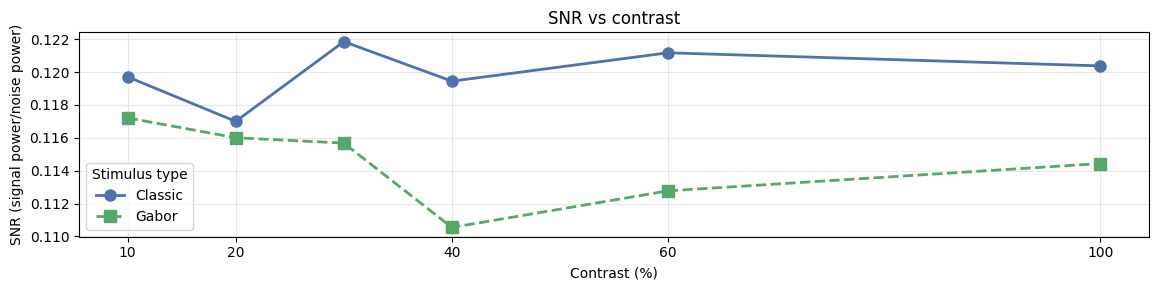

In [9]:
palette = {
    "classic": "#4C72B0",   # blue
    "grating": "#55A868",   # green
}
linestyle_map = {"classic": "-", "grating": "--"}

df_snr_group = (df_snr_use.groupby(["stim_type", "contrast"], as_index=False).agg(snr_linear=("snr_linear", "mean")))

plt.figure(figsize=(11.69, 3))  # A4 wide

for stim_type, group in df_snr_group.groupby("stim_type"):
    g = group.sort_values("contrast")

    plt.plot(g["contrast"],g["snr_linear"],
        marker="o" if stim_type == "classic" else "s",
        linestyle=linestyle_map[stim_type],
        color=palette[stim_type],
        label=stim_label_map[stim_type],
        linewidth=2,
        markersize=8,
    )

plt.xlabel("Contrast (%)")
plt.ylabel("SNR (signal power/noise power)")
plt.title("SNR vs contrast")
plt.xticks([10, 20, 40, 60, 100])
plt.grid(alpha=0.3)
plt.legend(title="Stimulus type")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "snr.pdf"),dpi=300,bbox_inches="tight")
plt.show()

In [10]:
df_snr["contrast"] = df_snr["contrast"].astype(str)

anova_snr = pg.rm_anova(
    data=df_snr,
    dv="snr_linear",
    within=["stim_type", "contrast"],
    subject="subject",
    detailed=True
)

anova_snr

C:\Users\donja\miniconda3\envs\thesis_env\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
C:\Users\donja\miniconda3\envs\thesis_env\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,stim_type,0.000284,1,4,0.000284,6.732713,0.060381,0.060381,0.000040,1.000000
1,contrast,0.000062,5,20,0.000012,1.057211,0.412743,0.394051,0.000009,0.433425
2,stim_type * contrast,0.000081,5,20,0.000016,0.655201,0.661153,0.563979,0.000011,0.467192


## Permutations

In [11]:
RESULTS_PERM = os.path.join(ROOT, "Results", "permutations")

within_summary_path = os.path.join(RESULTS_PERM, "within_perm_summary.csv")
between_csv         = os.path.join(RESULTS_PERM, "between_perm_per_subject.csv")

within = pd.read_csv(within_summary_path)
between = pd.read_csv(between_csv)

within_use = within[within["subject"] != "sub-004"].copy()
between_use = between[between["subject"] != "sub-004"].copy()

print("Within-condition perm shape :", within.shape)
print("Between-condition perm shape:", between.shape)
within_use.head(), between_use.head()

Within-condition perm shape : (60, 8)
Between-condition perm shape: (30, 5)


(   subject                          file stim_type  contrast  accuracy  \
 0  sub-002   sub-002_cvep_classic_10.npz   classic        10  0.842857   
 1  sub-002  sub-002_cvep_classic_100.npz   classic       100  0.966667   
 2  sub-002   sub-002_cvep_classic_20.npz   classic        20  0.966667   
 3  sub-002   sub-002_cvep_classic_30.npz   classic        30  1.000000   
 4  sub-002   sub-002_cvep_classic_40.npz   classic        40  1.000000   
 
    decision_time        itr  p_above_chance  
 0            4.2  51.343616             0.0  
 1            4.2  66.057397             0.0  
 2            4.2  66.057397             0.0  
 3            4.2  71.428571             0.0  
 4            4.2  71.428571             0.0  ,
    subject  contrast  difference_grating_minus_classic  p_value  n_perm
 0  sub-002        10                         -0.785714    1.000    1000
 1  sub-002        20                         -0.185714    0.895    1000
 2  sub-002        30                         

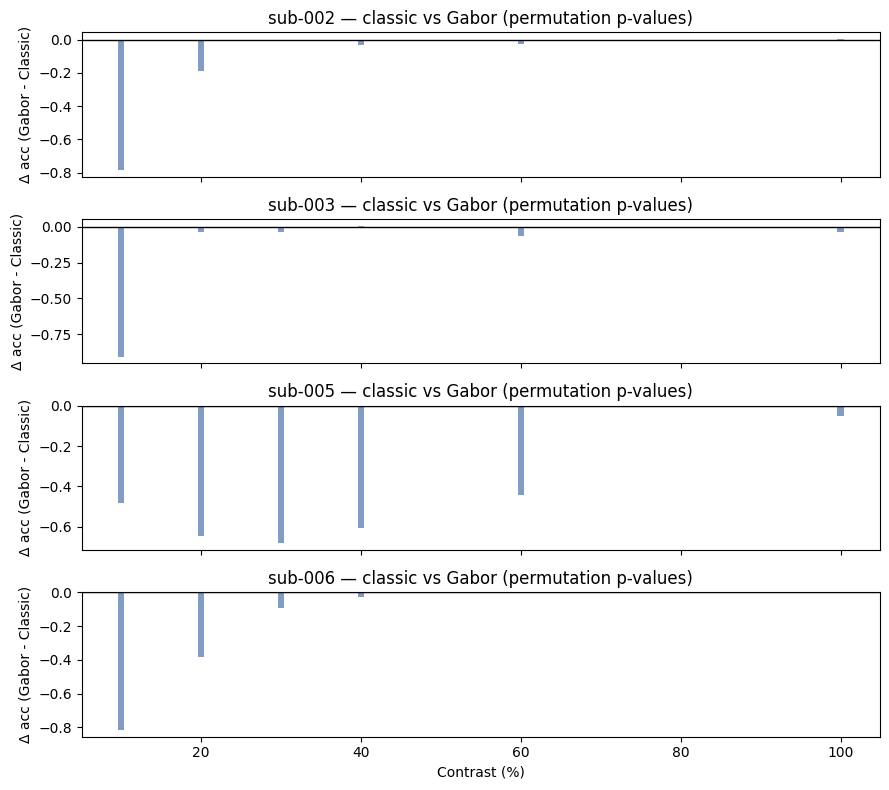

In [12]:
subjects = sorted(between_use["subject"].unique())
contrasts = sorted(between_use["contrast"].unique())

n_subj = len(subjects)
fig, axes = plt.subplots(
    nrows=n_subj,
    ncols=1,
    figsize=(9, 2 * n_subj),
    sharex=True,
)

if n_subj == 1:
    axes = [axes]

for ax, subj in zip(axes, subjects):
    df_sub = between_use[between_use["subject"] == subj].copy()
    df_sub = df_sub.sort_values("contrast")

    diffs = df_sub["difference_grating_minus_classic"].values
    cs    = df_sub["contrast"].values
    pvals = df_sub["p_value"].values

    colors = ["#55A868" if d > 0 else "#4C72B0" for d in diffs]  # green if grating > classic, blue otherwise
    bars = ax.bar(cs, diffs, color=colors, alpha=0.7)

    # add stars for p < 0.05
    for x, d, p in zip(cs, diffs, pvals):
        if p < 0.05:
            ax.text(
                x, d + 0.01 * np.sign(d if d != 0 else 1),
                "*",
                ha="center", va="bottom",
                fontsize=14, color="red",
            )

    ax.axhline(0, color="black", linewidth=1)
    ax.set_ylabel("Δ acc (Gabor - Classic)")
    ax.set_title(f"{subj} — classic vs Gabor (permutation p-values)")

axes[-1].set_xlabel("Contrast (%)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "between_condition_permutation.pdf"),dpi=300,bbox_inches="tight")
plt.show()

In [13]:
within_nulls_path = os.path.join(RESULTS_PERM, "within_perm_nulls.pkl")
df_perm = pd.read_pickle(within_nulls_path)
print("df_perm shape:", df_perm.shape)

df_perm_use = df_perm[df_perm["subject"] != "sub-004"].copy()

df_perm_use.head()

df_perm shape: (60, 7)


,subject,file,stim_type,contrast,true_accuracy,p_above_chance,perm_accs
0,sub-002,sub-002_cvep_classic_10.npz,classic,10,0.842857,0.0,"[0.06190476190476191, 0.06666666666666667, 0.0..."
1,sub-002,sub-002_cvep_classic_100.npz,classic,100,0.966667,0.0,"[0.0, 0.03333333333333333, 0.03333333333333333..."
2,sub-002,sub-002_cvep_classic_20.npz,classic,20,0.966667,0.0,"[0.06190476190476191, 0.0, 0.11904761904761904..."
3,sub-002,sub-002_cvep_classic_30.npz,classic,30,1.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142..."
4,sub-002,sub-002_cvep_classic_40.npz,classic,40,1.000000,0.0,"[0.09523809523809523, 0.03333333333333333, 0.0..."


In [14]:
def plot_all_perm_hists_sorted(df_perm, palette):
    sub = df_perm["subject"].iloc[0]
    sub_num = int(str(sub).split("-")[-1])

    df_classic = df_perm[df_perm["stim_type"] == "classic"].sort_values(
        by="contrast", ascending=False).reset_index(drop=True)
    df_grating = df_perm[df_perm["stim_type"] == "grating"].sort_values(
        by="contrast", ascending=False).reset_index(drop=True)

    n_rows = len(df_classic)

    fig, axes = plt.subplots(n_rows, 2, figsize=(11.69, 2.4*n_rows))
    plt.subplots_adjust(hspace=0.6)

    fig.suptitle(f"Permutation accuracies – Subject {sub_num}", fontsize=14, y=0.995)

    if n_rows == 1:
        axes = axes.reshape(1, 2)

    # Left column - classic
    for i in range(n_rows):
        ax = axes[i, 0]
        row = df_classic.iloc[i]
        perm_accs = row["perm_accs"]
        true_acc = row["true_accuracy"]
        contrast = row["contrast"]
        ax.hist(perm_accs, bins=15, alpha=0.6, color="lightgray", edgecolor="black")
        ax.axvline(true_acc, color=palette["classic"], linewidth=2)
        ax.set_title(f"Classic {contrast}%")
        ax.set_xlabel("Accuracy (%)")
        ax.set_ylabel("Count")
        ax.set_xlim(0,1)

    # Right column -  grating
    for i in range(n_rows):
        ax = axes[i, 1]
        row = df_grating.iloc[i]
        perm_accs = row["perm_accs"]
        true_acc = row["true_accuracy"]
        contrast = row["contrast"]
        ax.hist(perm_accs, bins=15, alpha=0.6, color="lightgray", edgecolor="black")
        ax.axvline(true_acc, color=palette["grating"], linewidth=2)
        ax.set_title(f"Gabor {contrast}%")
        ax.set_xlabel("Accuracy (%)")
        ax.set_ylabel("Count")
        ax.set_xlim(0,1)

    plt.tight_layout()
    return fig

pdf_path = os.path.join(FIG_DIR, "permutation_results_all_subjects.pdf")

with PdfPages(pdf_path) as pdf:
    for subject, df_sub in df_perm_use.groupby("subject"):
        fig = plot_all_perm_hists_sorted(df_sub, palette=palette)
        pdf.savefig(fig, bbox_inches="tight")
        plt.close(fig)

print("Saved", pdf_path)

Saved C:\Users\donja\Desktop\Thesis\Results\permutation_results_all_subjects.pdf
